# Statistics of KuaiRec

EDA of the KuaiRand dataset. The description of this dataset can be referred to https://kuairand.com/

## Load data

In [1]:
!wget https://zenodo.org/records/10439422/files/KuaiRand-1K.tar.gz #  (md5:6b0b9c8222d67fcd4c676218edca3f1f)
!tar -xzvf KuaiRand-1K.tar.gz

--2024-12-29 13:23:54--  https://zenodo.org/records/10439422/files/KuaiRand-1K.tar.gz
Resolving zenodo.org (zenodo.org)... 188.185.43.25, 188.185.45.92, 188.185.48.194, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1135436720 (1.1G) [application/octet-stream]
Saving to: ‘KuaiRand-1K.tar.gz’

KuaiRand-1K.tar.gz  100%[===================>]   1.06G  11.9MB/s    in 89s     

2024-12-29 13:25:24 (12.2 MB/s) - ‘KuaiRand-1K.tar.gz’ saved [1135436720/1135436720]

KuaiRand-1K/
KuaiRand-1K/LICENSE
KuaiRand-1K/figs/
KuaiRand-1K/README.md
KuaiRand-1K/data/
KuaiRand-1K/load_data_1k.py
KuaiRand-1K/data/video_features_basic_1k.csv
KuaiRand-1K/data/video_features_statistic_1k.csv
KuaiRand-1K/data/log_standard_4_08_to_4_21_1k.csv
KuaiRand-1K/data/log_standard_4_22_to_5_08_1k.csv
KuaiRand-1K/data/log_random_4_22_to_5_08_1k.csv
KuaiRand-1K/data/user_features_1k.csv
KuaiRand-1K/figs/kuaishou-app.png
KuaiRand-1K/figs/three-

```  
  KuaiRand-1K
  ├── data (4.3GB)
  │   ├── log_random_4_22_to_5_08_1k.csv (2.9MB)
  │   ├── log_standard_4_08_to_4_21_1k.csv (368MB)
  │   ├── log_standard_4_22_to_5_08_1k.csv (481MB)
  │   ├── user_features_1k.csv (132KB)
  │   ├── video_features_basic_1k.csv (368MB)
  │   └── video_features_statistic_1k.csv (3.1GB)
  └── load_data_1k.py

```



- **log_random_4_22_to_5_08.csv** contains all interactions resulting from random intervention.

- **log_standard_4_22_to_5_08.csv** contains all interactions of standard recommendation.

- **log_standard_4_08_to_4_21.csv** contains all interactions of standard recommendation for the same users in the previous two weeks (2022.04.08 ~ 2022.04.21).

In [2]:
import pandas as pd

rootpath = '/content/KuaiRand-1K/'
print("Loading logs matrices...")
big_log_matrix = pd.read_csv(rootpath + "data/log_random_4_22_to_5_08_1k.csv")
small_log_matrix1 = pd.read_csv(rootpath + "data/log_standard_4_08_to_4_21_1k.csv")
small_log_matrix2 = pd.read_csv(rootpath + "data/log_standard_4_22_to_5_08_1k.csv")

print("Loading item features...")
item_categories_basic = pd.read_csv(rootpath + "data/video_features_basic_1k.csv")
item_categories_statistic = pd.read_csv(rootpath + "data/video_features_statistic_1k.csv")

print("Loading user features...")
user_features = pd.read_csv(rootpath + "data/user_features_1k.csv")

print("All data loaded.")

Loading logs matrices...
Loading item features...
Loading user features...
All data loaded.


## Visualization of the six tables

In [4]:
big_log_matrix.head(10)

,user_id,video_id,date,hourmin,time_ms,is_click,is_like,is_follow,is_comment,is_forward,is_hate,long_view,play_time_ms,duration_ms,profile_stay_time,comment_stay_time,is_profile_enter,is_rand,tab
0,0,5543,20220430,1800,1651314030792,0,0,0,0,0,0,0,863,30066,0,0,0,1,1
1,0,1836,20220502,1200,1651466607423,0,0,0,0,0,0,0,1190,132433,0,0,0,1,1
2,0,721,20220502,1700,1651481542743,0,0,0,0,0,0,0,1528,25266,0,0,0,1,1
3,0,442,20220502,1800,1651488577163,0,0,0,0,0,0,0,1490,12000,0,0,0,1,1
4,0,62,20220503,800,1651535940163,0,0,0,0,0,0,0,1419,169500,0,0,0,1,1
5,0,7303,20220504,900,1651625898330,0,0,0,0,0,0,0,1105,55533,0,0,0,1,1
6,0,6308,20220504,900,1651628052625,0,0,0,0,0,0,0,1704,7600,0,0,0,1,1
7,0,6614,20220506,700,1651793743336,0,0,0,0,0,0,0,1141,0,0,0,0,1,1
8,0,5066,20220506,700,1651793764164,0,0,0,0,0,0,0,1409,16966,0,0,0,1,1
9,0,4327,20220506,1000,1651804528290,0,0,0,0,0,0,0,1287,150233,0,0,0,1,1


Distribution of "The time of this interaction (format: HHSS)."

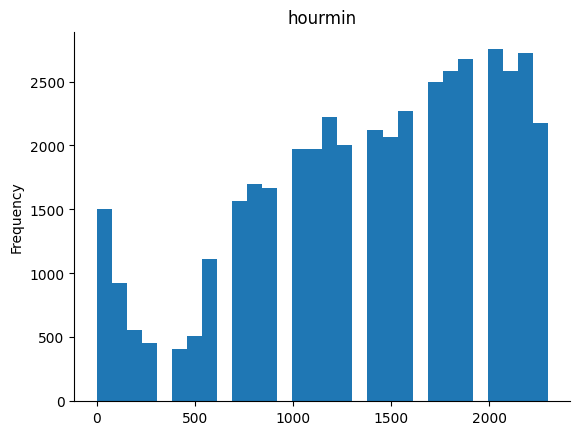

In [8]:
from matplotlib import pyplot as plt
big_log_matrix['hourmin'].plot(kind='hist', bins=30, title='hourmin')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
big_log_matrix.nunique()

,0
user_id,1000
video_id,7388
date,17
hourmin,24
time_ms,43027
is_click,2
is_like,2
is_follow,2
is_comment,2
is_forward,2


In [14]:
small_log_matrix1.head(10)

,user_id,video_id,date,hourmin,time_ms,is_click,is_like,is_follow,is_comment,is_forward,is_hate,long_view,play_time_ms,duration_ms,profile_stay_time,comment_stay_time,is_profile_enter,is_rand,tab
0,0,4354972,20220409,900,1649467982289,0,0,0,0,0,0,0,0,70100,0,0,0,0,0
1,0,1329429,20220409,900,1649467982289,0,0,0,0,0,0,0,0,51422,0,0,0,0,0
2,0,346081,20220409,900,1649467982289,0,0,0,0,0,0,0,0,11696,0,0,0,0,0
3,0,2058916,20220409,900,1649467982289,0,0,0,0,0,0,0,0,66433,0,0,0,0,0
4,0,2528540,20220409,900,1649467982289,1,0,0,0,0,0,0,5332,11450,0,0,0,0,0
5,0,1966868,20220409,900,1649467982289,0,0,0,0,0,0,0,0,22016,0,0,0,0,0
6,0,2378158,20220409,900,1649467982289,0,0,0,0,0,0,0,0,42633,0,0,0,0,0
7,0,3872621,20220409,900,1649467982289,0,0,0,0,0,0,0,0,24857,0,0,0,0,0
8,0,2291992,20220409,900,1649467982289,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1252602,20220409,900,1649467982289,0,0,0,0,0,0,0,0,34898,0,0,0,0,0


In [15]:
small_log_matrix1.nunique()

,0
user_id,983
video_id,2119510
date,14
hourmin,24
time_ms,877808
is_click,2
is_like,2
is_follow,2
is_comment,2
is_forward,2


In [16]:
small_log_matrix2.head(10)

,user_id,video_id,date,hourmin,time_ms,is_click,is_like,is_follow,is_comment,is_forward,is_hate,long_view,play_time_ms,duration_ms,profile_stay_time,comment_stay_time,is_profile_enter,is_rand,tab
0,0,554434,20220422,500,1650575715200,0,0,0,0,0,0,0,3925,7833,0,0,1,0,1
1,0,1848093,20220422,500,1650575727466,0,0,0,0,0,0,0,0,106900,0,0,0,0,0
2,0,4226937,20220422,500,1650575727466,0,0,0,0,0,0,0,0,130533,0,0,0,0,0
3,0,553206,20220422,500,1650575727466,0,0,0,0,0,0,0,0,300038,0,0,0,0,0
4,0,979987,20220422,500,1650575727466,0,0,0,0,0,0,0,0,37463,0,0,0,0,0
5,0,2019165,20220422,800,1650585311434,0,0,0,0,0,0,0,1443,178233,0,0,0,0,1
6,0,2133392,20220422,800,1650585311434,0,0,0,0,0,0,0,2735,0,0,0,0,0,1
7,0,3800048,20220422,800,1650585311434,0,0,0,0,0,0,0,2293,13166,0,0,0,0,1
8,0,345849,20220422,800,1650585311434,0,0,0,0,0,0,0,2818,7066,0,0,0,0,1
9,0,1033272,20220422,800,1650585311434,1,0,0,0,0,0,1,30389,12900,0,0,0,0,1


In [17]:
small_log_matrix2.nunique()

,0
user_id,1000
video_id,2664050
date,17
hourmin,24
time_ms,1151968
is_click,2
is_like,2
is_follow,2
is_comment,2
is_forward,2


In [18]:
item_categories_basic.head()

,video_id,author_id,video_type,upload_dt,upload_type,visible_status,video_duration,server_width,server_height,music_id,music_type,tag
0,0,7349781,NORMAL,2022-04-10,LongImport,0.0,87433.0,720.0,1280.0,9155697141,9.0,39
1,1,2103883,NORMAL,2022-04-10,Kmovie,0.0,218066.0,720.0,1280.0,6355810746,9.0,2
2,2,5067285,NORMAL,2022-04-09,ShortImport,0.0,9233.0,720.0,1280.0,6618412736,4.0,1
3,3,7048760,NORMAL,2022-04-11,Web,0.0,16433.0,720.0,1280.0,9161677205,9.0,7
4,4,8635271,NORMAL,2022-04-09,Web,0.0,38766.0,720.0,1280.0,9141092381,9.0,9


In [19]:
item_categories_basic.nunique()

,0
video_id,4371868
author_id,1407475
video_type,3
upload_dt,235
upload_type,32
visible_status,3
video_duration,212211
server_width,3109
server_height,3997
music_id,2622610


In [4]:
item_categories_statistic.head(10)

,video_id,counts,show_cnt,show_user_num,play_cnt,play_user_num,play_duration,complete_play_cnt,complete_play_user_num,valid_play_cnt,...,reduce_similar_user_num,collect_cnt,collect_user_num,cancel_collect_cnt,cancel_collect_user_num,direct_comment_user_num,reply_comment_user_num,share_all_cnt,share_all_user_num,outsite_share_all_cnt
0,0,102,2579.686275,2308.323529,816.882353,713.176471,2.767915e+07,195.254902,183.098039,443.019608,...,0.911765,0.901961,0.882353,0.235294,0.235294,0.156863,0.039216,0.117647,0.107843,0.078431
1,1,136,4027.992647,3368.367647,2116.250000,1864.044118,8.592152e+07,130.507353,125.941176,717.676471,...,2.279412,6.683824,6.470588,1.279412,1.176471,1.867647,0.551471,5.470588,4.963235,4.691176
2,2,91,666.703297,547.219780,425.681319,386.538462,4.197048e+06,80.208791,75.461538,95.725275,...,2.670330,1.835165,1.791209,0.681319,0.659341,1.153846,0.054945,0.296703,0.274725,0.285714
3,3,72,1134.194444,1097.958333,940.027778,854.833333,5.222510e+06,115.930556,92.194444,253.708333,...,0.805556,0.972222,0.875000,0.222222,0.180556,0.041667,0.000000,0.027778,0.027778,0.013889
4,4,178,4873.713483,4649.955056,4304.314607,3961.449438,1.119292e+08,1329.078652,1314.398876,2871.129213,...,3.971910,13.691011,13.410112,4.983146,4.825843,24.865169,15.286517,27.949438,25.775281,8.488764
5,5,174,4645.402299,2937.373563,2360.522989,1772.856322,2.801945e+08,496.954023,486.574713,1359.735632,...,1.701149,34.862069,32.729885,24.500000,23.344828,3.586207,0.557471,2.396552,1.977011,1.385057
6,6,122,6644.614754,6500.959016,6437.934426,5968.295082,2.914201e+08,678.368852,676.901639,4038.163934,...,12.188525,8.991803,8.762295,5.303279,5.106557,1.778689,0.401639,0.778689,0.639344,0.459016
7,7,101,1635.613861,1430.000000,381.792079,350.594059,2.783802e+06,5.693069,5.386139,126.316832,...,0.495050,2.049505,2.049505,0.316832,0.316832,0.217822,0.019802,0.653465,0.574257,0.435644
8,8,180,36829.827778,28776.722222,20458.238889,15334.477778,1.090443e+09,3406.238889,3365.361111,12095.177778,...,14.300000,303.922222,293.111111,152.677778,146.605556,37.683333,17.733333,21.633333,18.594444,2.422222
9,9,132,3121.083333,2506.689394,1325.015152,1138.734848,3.195854e+07,192.659091,180.143939,516.446970,...,1.340909,9.719697,9.378788,2.007576,1.780303,0.416667,0.030303,5.325758,4.825758,4.780303


In [3]:
item_categories_statistic.nunique()

,0
video_id,4371868
counts,189
show_cnt,3175236
show_user_num,3119637
play_cnt,2872004
play_user_num,2825383
play_duration,4369949
complete_play_cnt,2011395
complete_play_user_num,1995880
valid_play_cnt,2499223


In [20]:
user_features.head(10)

,user_id,user_active_degree,is_lowactive_period,is_live_streamer,is_video_author,follow_user_num,follow_user_num_range,fans_user_num,fans_user_num_range,friend_user_num,...,onehot_feat8,onehot_feat9,onehot_feat10,onehot_feat11,onehot_feat12,onehot_feat13,onehot_feat14,onehot_feat15,onehot_feat16,onehot_feat17
0,0,full_active,0,1,1,514,500+,150,"[100,1k)",34,...,135,6,3,0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,full_active,0,-124,1,457,"(250,500]",20,"[10,100)",3,...,283,6,2,2,1.0,0.0,1.0,0.0,0.0,0.0
2,2,full_active,0,-124,1,8,"(0,10]",26,"[10,100)",3,...,275,5,2,2,0.0,0.0,0.0,1.0,0.0,0.0
3,3,full_active,0,1,1,91,"(50,100]",2166,"[1k,5k)",14,...,118,6,2,2,1.0,0.0,0.0,0.0,0.0,0.0
4,4,full_active,0,-124,1,261,"(250,500]",10,"[10,100)",4,...,378,3,3,0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,full_active,0,-124,1,15,"(10,50]",23,"[10,100)",2,...,101,5,3,0,1.0,0.0,1.0,0.0,0.0,0.0
6,6,full_active,0,-124,0,75,"(50,100]",26,"[10,100)",23,...,264,4,2,0,1.0,0.0,0.0,0.0,0.0,0.0
7,7,full_active,0,-124,1,2103,500+,56,"[10,100)",43,...,396,3,3,0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,high_active,0,-124,1,265,"(250,500]",27,"[10,100)",12,...,188,3,3,0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,high_active,0,-124,0,71,"(50,100]",0,0,0,...,400,5,0,0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
user_features.nunique()

,0
user_id,1000
user_active_degree,7
is_lowactive_period,1
is_live_streamer,2
is_video_author,2
follow_user_num,532
follow_user_num_range,8
fans_user_num,379
fans_user_num_range,8
friend_user_num,264


## IsNa?


In [52]:
user_features.isnull().sum()  # need to fill nans with 0s or find close vectors

,0
user_id,0
user_active_degree,0
is_lowactive_period,0
is_live_streamer,0
is_video_author,0
follow_user_num,0
follow_user_num_range,0
fans_user_num,0
fans_user_num_range,0
friend_user_num,0


In [5]:
item_categories_statistic.isnull().sum()

,0
video_id,0
counts,0
show_cnt,0
show_user_num,0
play_cnt,0
play_user_num,0
play_duration,0
complete_play_cnt,0
complete_play_user_num,0
valid_play_cnt,0


In [53]:
item_categories_basic.isnull().sum()  # need to fill nans with 0s or find close vectors

,0
video_id,0
author_id,0
video_type,0
upload_dt,58
upload_type,0
visible_status,5
video_duration,573057
server_width,7
server_height,7
music_id,0


In [54]:
small_log_matrix2.isnull().sum()

,0
user_id,0
video_id,0
date,0
hourmin,0
time_ms,0
is_click,0
is_like,0
is_follow,0
is_comment,0
is_forward,0


In [55]:
small_log_matrix1.isnull().sum()

,0
user_id,0
video_id,0
date,0
hourmin,0
time_ms,0
is_click,0
is_like,0
is_follow,0
is_comment,0
is_forward,0


In [56]:
big_log_matrix.isnull().sum()

,0
user_id,0
video_id,0
date,0
hourmin,0
time_ms,0
is_click,0
is_like,0
is_follow,0
is_comment,0
is_forward,0


## Codes for visualization

In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname="./SimHei.ttf")

def visual_continue(df, func=None):
    ax = sns.distplot(df)
    if func:
        func(ax)

    gca = plt.gca()
    fig_title = "Statistics of {}".format(df.name)
    gca.set_title(fig_title, fontsize=14)
    gca.set_ylabel("Density", fontsize=14)
    gca.set_xlabel(df.name, fontsize=14)

    plt.show()

def visual_statistics_discrete(df, var="my_variable", display_ratio=True, func=None, order=None, size=(10, 5), max_xticks=20):
    ncount = len(df)

    fig, ax1 = plt.subplots(figsize=size)

    # Order categories if specified
    if order is None:
        order = df[var].value_counts().index

    sns.countplot(x=var, data=df, color="#9fc5e8", linewidth=.6, edgecolor='k', ax=ax1, order=order)

    plt.grid(axis='y', linestyle='-.', alpha=0.6)

    # Adjust labels and title
    ax1.set_title(f"Statistics of {var}", fontsize=14)
    ax1.set_ylabel("Count", fontsize=12)
    ax1.set_xlabel(var, fontsize=12)

    # Limit number of xticks
    if len(order) > max_xticks:
        xticks = np.linspace(0, len(order) - 1, max_xticks, dtype=int)
        ax1.set_xticks(xticks)
        ax1.set_xticklabels([order[i] for i in xticks], rotation=45, ha='right', fontsize=10)
    else:
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)

    if func:
        func(ax1)

    if display_ratio:
        # Make twin axis for ratio percentage
        ax2 = ax1.twinx()
        ax2.set_ylabel("Ratio (%)", fontsize=12)
        ax2.set_ylim(0, ax1.get_ylim()[1] / ncount * 100)

    plt.tight_layout()
    plt.show()

In [35]:
import warnings
warnings.simplefilter('ignore')

## Statistics of social network

count    1000.000000
mean      111.419000
std       364.105447
min         0.000000
25%         2.000000
50%        14.000000
75%        77.000000
max      4690.000000
Name: friend_user_num, dtype: float64


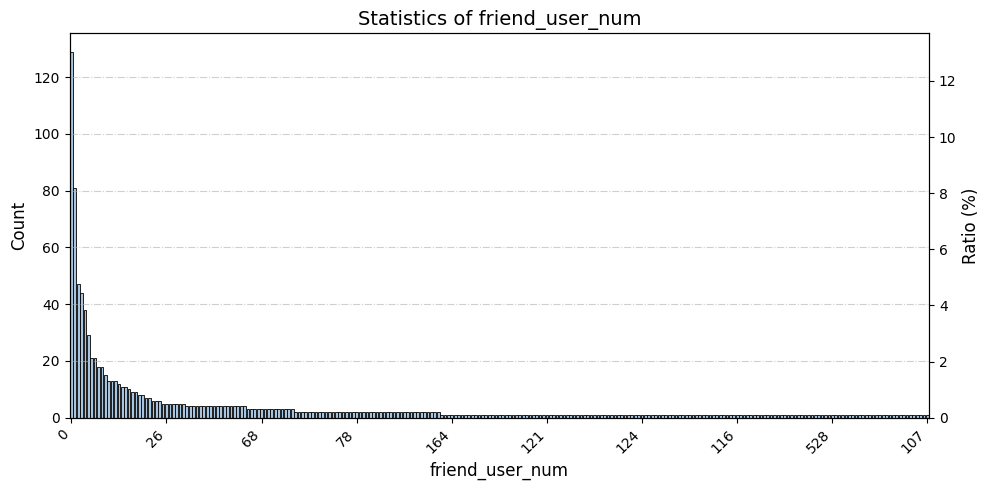

In [64]:
print(user_features.friend_user_num.describe())
visual_statistics_discrete(user_features[user_features.friend_user_num < 1400], "friend_user_num", max_xticks=10)

A lot of users has num of friends close to 0, need to check correlation between activity of user and num of friens


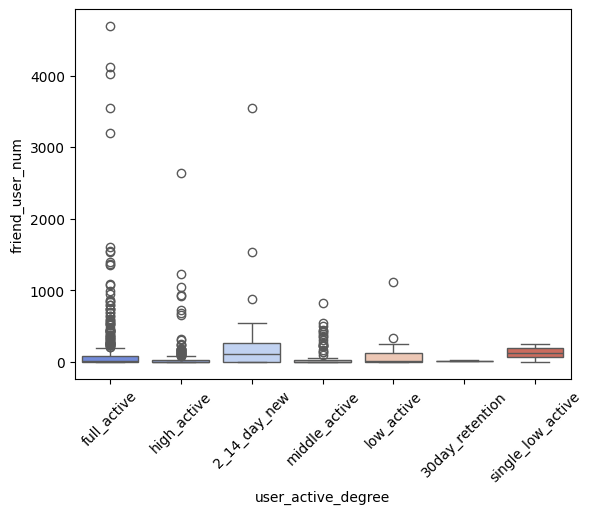

In [58]:
sns.boxplot(x="user_active_degree", y="friend_user_num", data=user_features, palette="coolwarm")
plt.xticks(rotation=45)
plt.show()

## Statistics of video features

In [42]:
item_categories_basic.describe()

,video_id,author_id,visible_status,video_duration,server_width,server_height,music_id,music_type
count,4.371868e+06,4.371868e+06,4.371863e+06,3.798811e+06,4.371861e+06,4.371861e+06,4.371868e+06,4.311916e+06
mean,2.185965e+06,4.756561e+06,5.662575e-03,7.570788e+04,8.132551e+02,1.234890e+03,7.789637e+09,7.841732e+00
std,1.262050e+06,2.739835e+06,7.669200e-02,1.060211e+05,2.630641e+02,3.100467e+02,2.307389e+09,2.058171e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,4.800000e+01,3.300000e+01,0.000000e+00,1.000000e+00
25%,1.092999e+06,2.286118e+06,0.000000e+00,1.206200e+04,7.200000e+02,1.280000e+03,7.196587e+09,8.000000e+00
50%,2.185966e+06,5.092652e+06,0.000000e+00,3.510000e+04,7.200000e+02,1.280000e+03,8.910477e+09,9.000000e+00
75%,3.278932e+06,7.283325e+06,0.000000e+00,9.753300e+04,7.200000e+02,1.280000e+03,9.256006e+09,9.000000e+00
max,4.371899e+06,8.839697e+06,3.000000e+00,1.651308e+07,8.394000e+03,1.182600e+04,9.479076e+09,1.100000e+01


## Distribution of the music type of items

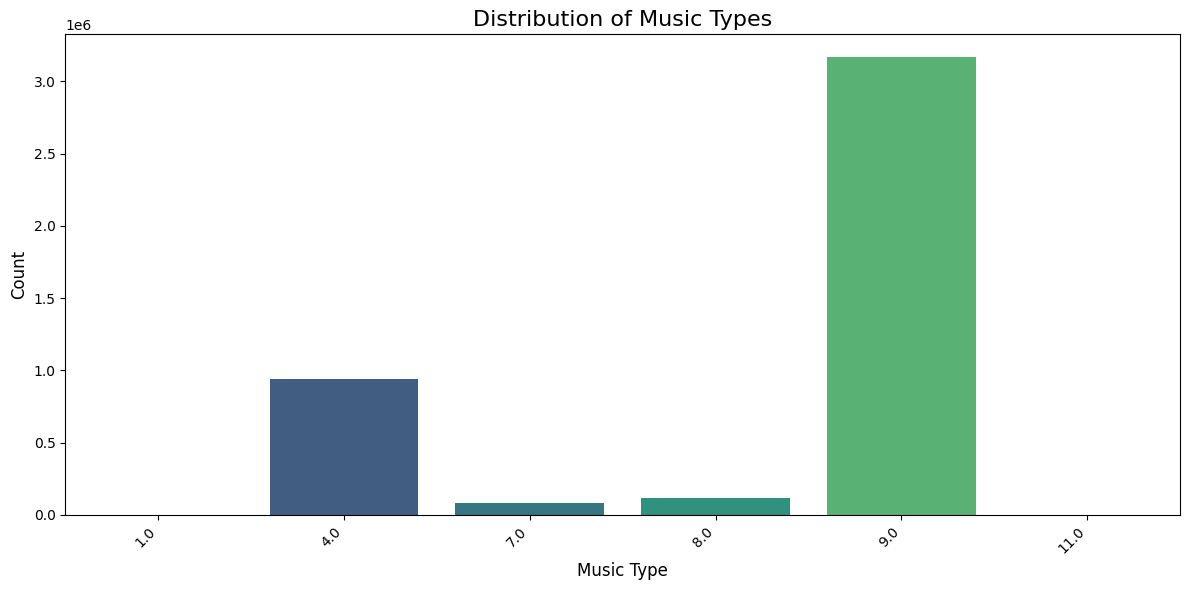

In [59]:
music_type_counts = item_categories_basic['music_type'].value_counts()

music_type_df = music_type_counts.reset_index()
music_type_df.columns = ['music_type', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(x='music_type', y='count', data=music_type_df, palette='viridis')
plt.xticks(rotation=45, ha='right')

plt.title("Distribution of Music Types", fontsize=16)
plt.xlabel("Music Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

## Distribution of watch_ratio in matrices


In [60]:
big_log_matrix['watch_ratio'] = big_log_matrix['play_time_ms'] / big_log_matrix['duration_ms']
small_log_matrix1['watch_ratio'] = small_log_matrix1['play_time_ms'] / small_log_matrix1['duration_ms']
small_log_matrix2['watch_ratio'] = small_log_matrix2['play_time_ms'] / small_log_matrix2['duration_ms']

count    41698.000000
mean         0.135103
std          0.287902
min          0.000000
25%          0.013325
50%          0.034208
75%          0.108766
max          4.941220
Name: watch_ratio, dtype: float64


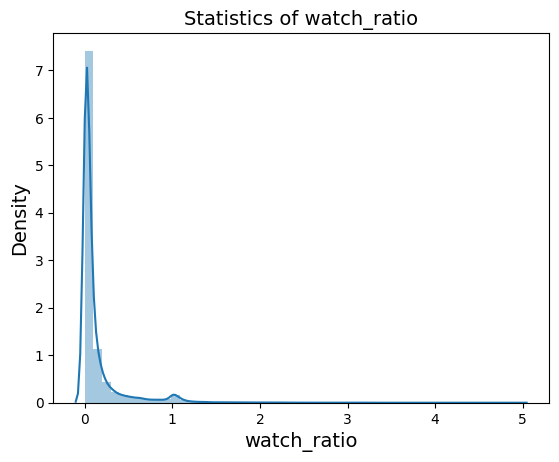

In [61]:
big_watch_ratio = big_log_matrix.watch_ratio[big_log_matrix.watch_ratio <= 5]
print(big_watch_ratio.describe())
visual_continue(big_watch_ratio)

count    4.630627e+06
mean     3.928446e-01
std      5.968137e-01
min      0.000000e+00
25%      1.041357e-02
50%      1.091216e-01
75%      6.065836e-01
max      4.999848e+00
Name: watch_ratio, dtype: float64


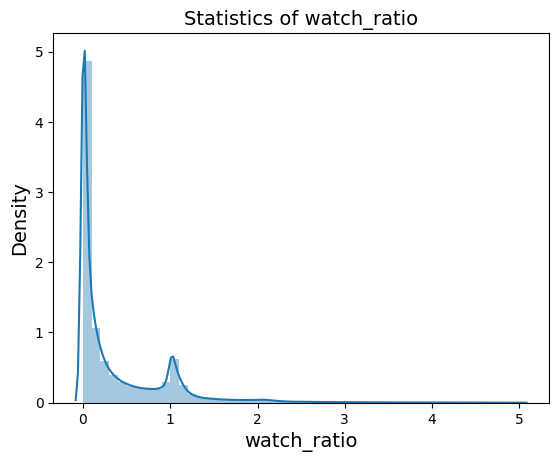

In [62]:
small1_watch_ratio = small_log_matrix1.watch_ratio[small_log_matrix1.watch_ratio <= 5]
print(small1_watch_ratio.describe())
visual_continue(small1_watch_ratio)

count    6.110437e+06
mean     3.944955e-01
std      5.986094e-01
min      0.000000e+00
25%      1.125614e-02
50%      1.103773e-01
75%      6.072466e-01
max      5.000000e+00
Name: watch_ratio, dtype: float64


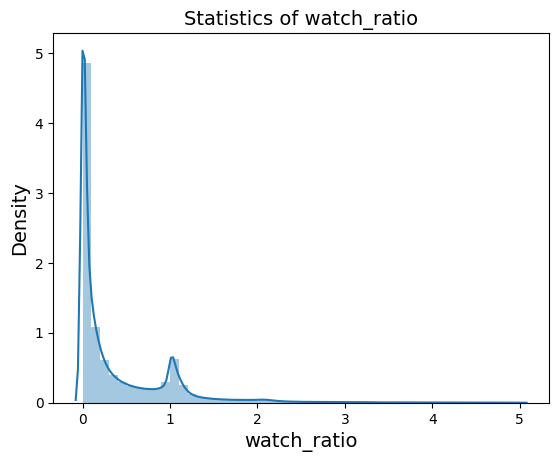

In [63]:
small2_watch_ratio = small_log_matrix2.watch_ratio[small_log_matrix2.watch_ratio <= 5]
print(small2_watch_ratio.describe())
visual_continue(small2_watch_ratio)

## Distribution of video duration in the matrices (in millisecond)

count    4.302800e+04
mean     1.053191e+05
std      1.049446e+05
min      0.000000e+00
25%      2.843300e+04
50%      7.740000e+04
75%      1.462660e+05
max      1.177720e+06
Name: duration_ms, dtype: float64


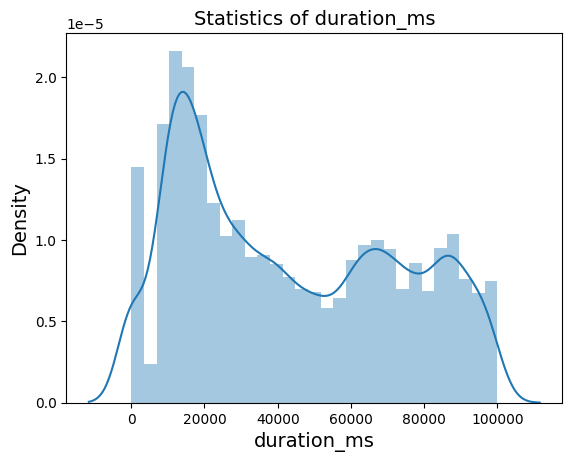

In [65]:
big_video_duration = big_log_matrix.duration_ms
print(big_video_duration.describe())
# visual_continue(big_video_duration)
visual_continue(big_video_duration[big_video_duration < 100000])

count    5.055984e+06
mean     7.261455e+04
std      1.030967e+05
min      0.000000e+00
25%      1.042400e+04
50%      2.986600e+04
75%      9.688000e+04
max      1.086972e+07
Name: duration_ms, dtype: float64


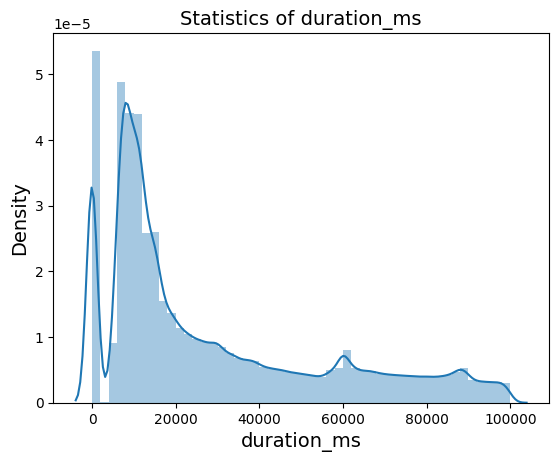

In [68]:
small1_video_duration = small_log_matrix1.duration_ms
print(small1_video_duration.describe())
visual_continue(small1_video_duration[small1_video_duration < 100000])

count    6.657061e+06
mean     7.185159e+04
std      1.030009e+05
min      0.000000e+00
25%      1.032400e+04
50%      2.843300e+04
75%      9.460000e+04
max      1.651308e+07
Name: duration_ms, dtype: float64


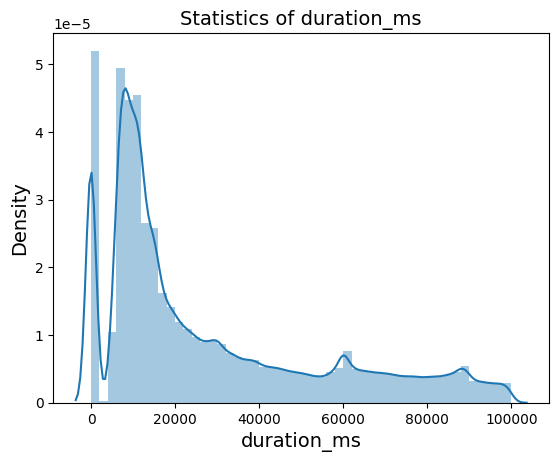

In [67]:
small2_video_duration = small_log_matrix2.duration_ms
print(small2_video_duration.describe())
visual_continue(small2_video_duration[small2_video_duration < 100000])

## Distribution of each user's total play times in the big matrix

              date
count  1000.000000
mean     43.028000
std      58.399432
min      10.000000
25%      13.000000
50%      22.000000
75%      46.000000
max     650.000000


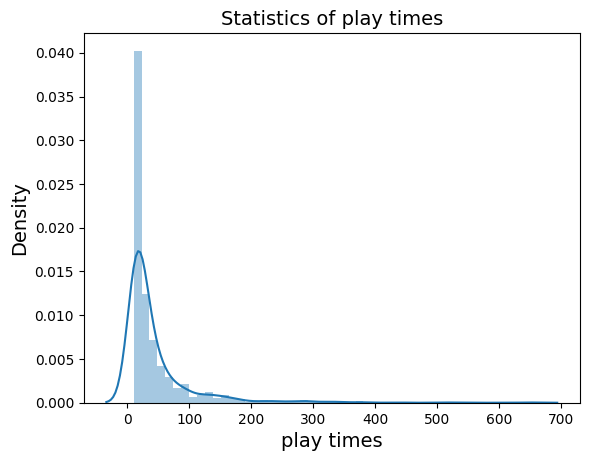

In [69]:
big_play_time = big_log_matrix.groupby('user_id').agg({"date":len})
big_play_time.name = "play times"
print(big_play_time.describe())
visual_continue(big_play_time)

               date
count    983.000000
mean    5143.422177
std     5625.262124
min        3.000000
25%     1700.000000
50%     3489.000000
75%     6483.000000
max    49242.000000


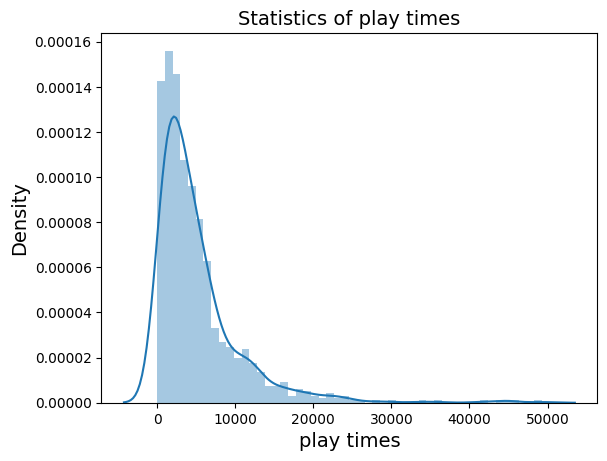

In [70]:
small1_play_time = small_log_matrix1.groupby('user_id').agg({"date":len})
small1_play_time.name = "play times"
print(small1_play_time.describe())
visual_continue(small1_play_time)

               date
count   1000.000000
mean    6657.061000
std     6836.900331
min      116.000000
25%     2508.000000
50%     4751.500000
75%     8643.000000
max    78315.000000


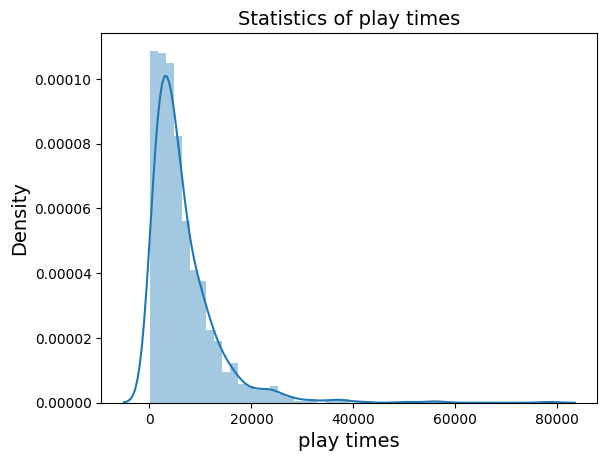

In [71]:
small2_play_time = small_log_matrix2.groupby('user_id').agg({"date":len})
small2_play_time.name = "play times"
print(small2_play_time.describe())
visual_continue(small2_play_time)

## Distribution of each user's daily play times in the big matrix

count    8049.000000
mean        5.345757
std         7.646049
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       220.000000
Name: play times, dtype: float64


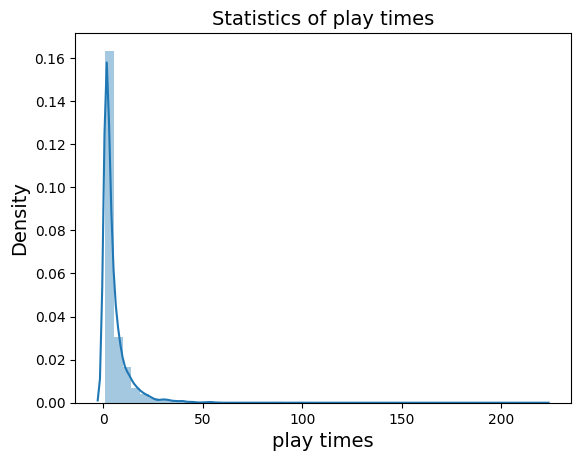

In [72]:
big_daily_play_time = big_log_matrix.groupby(['user_id', 'date']).size()
big_daily_play_time.name = "play times"
print(big_daily_play_time.describe())
visual_continue(big_daily_play_time)

## Distribution of each user's daily play times in the small matrix

count    12317.000000
mean       410.488268
std        508.052703
min          1.000000
25%        101.000000
50%        252.000000
75%        523.000000
max       6807.000000
Name: play times, dtype: float64


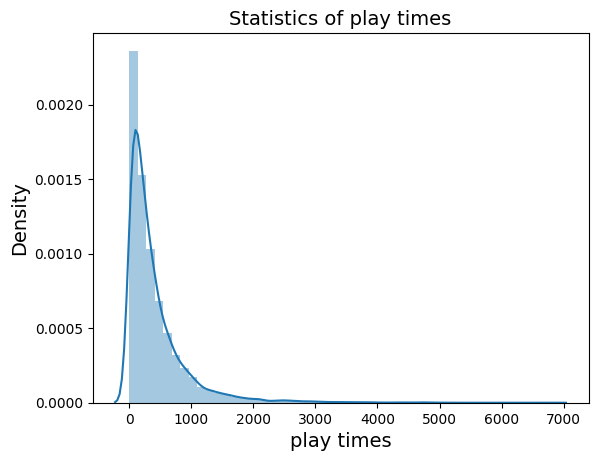

In [73]:
small_daily_play_time = small_log_matrix1.groupby(['user_id', 'date']).size()
small_daily_play_time.name = "play times"
print(small_daily_play_time.describe())
visual_continue(small_daily_play_time)

count    12317.000000
mean       410.488268
std        508.052703
min          1.000000
25%        101.000000
50%        252.000000
75%        523.000000
max       6807.000000
Name: play times, dtype: float64


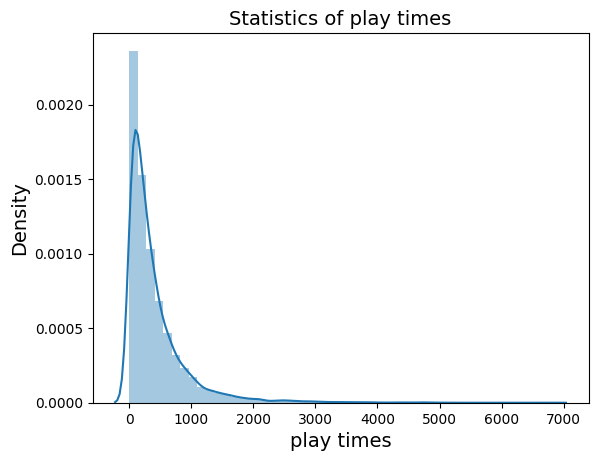

In [74]:
small_daily_play_time = small_log_matrix1.groupby(['user_id', 'date']).size()
small_daily_play_time.name = "play times"
print(small_daily_play_time.describe())
visual_continue(small_daily_play_time)